In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
names = list(open('names.txt').read().splitlines())

In [4]:
# Created Dictionary of letters in the data
letters = set()
for name in names:
    for ch in name:
        letters.add(ch)

letters = list(sorted(letters))
stoi = {ch: i+1 for i, ch in enumerate(letters)}
stoi['.'] = 0
itos = { v: k for k, v in stoi.items()}

In [5]:
# Create a 2-D matrix to store the occurrences of each pair
N = torch.zeros(27, 27, dtype=torch.int32)

In [6]:
for name in names:
    chars = '.' + name + '.'
    for ch1, ch2 in zip(chars, chars[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1][idx2] += 1

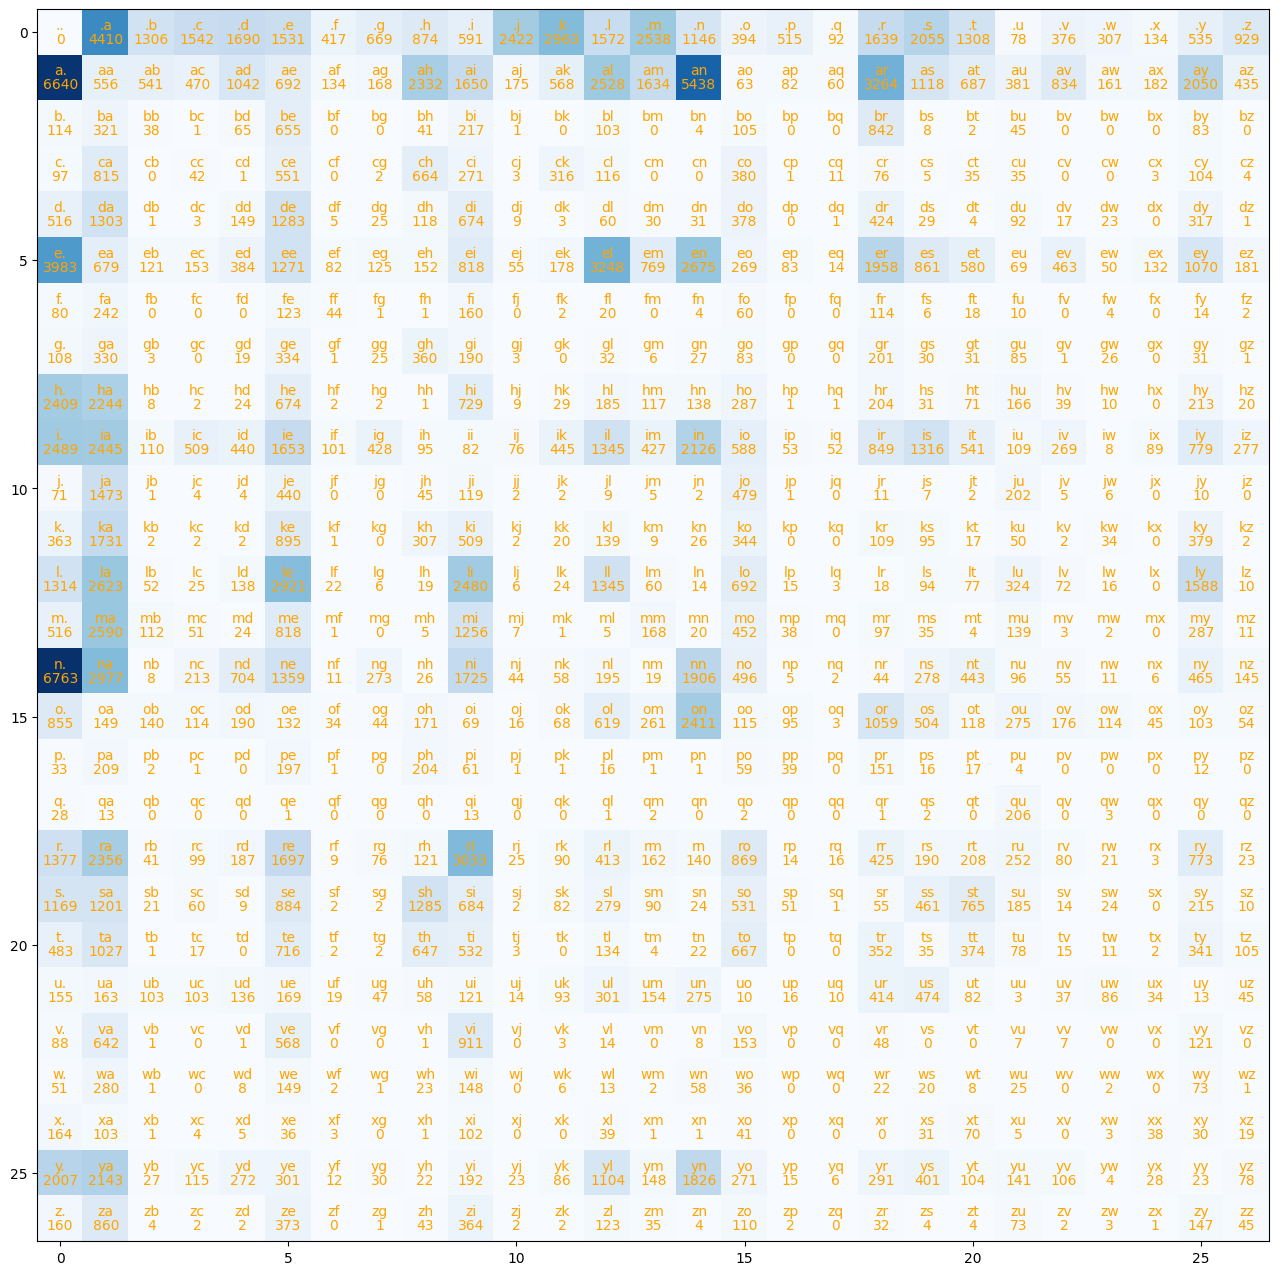

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='orange')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='orange')

In [8]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [9]:
g = torch.Generator().manual_seed(2147483647)
for i in range(25):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.


In [47]:
## Maximum Likelihood ##
log_likelihood = 0.0
count = 0
for name in ['mquare']:
    chars = '.' + name + '.'
    for ch1, ch2 in zip(chars, chars[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        count += 1
        print(f'{ch1+ch2} -> {prob: .4f}, {logprob: .4f}')

# As closer to zero as good the model is, Log is used as probabilities are small and their
# product will be even smaller hence we use log
print(f'Log Likelihood: {log_likelihood: .4f}')  
# As convention we want our loss to decrease when our model is good hence we use Negative LL
nll = -1*log_likelihood
print(f'Negative Log Likelihood: {nll: .4f}') 
# To normalize the loss we take average of it
print(f'Average NLL: {nll/count: .4f}')
# The probability to get q after m is 0 hence the model thinks it is very unlikely to get this name generated by the model
# hence the inf in likelihood,
# To avoid getting infinity in the calculations it is better to add some fake counts into our model, we can do this by doing N+1000

.m ->  0.0792, -2.5354
mq ->  0.0000, -inf
qu ->  0.7574, -0.2779
ua ->  0.0520, -2.9566
ar ->  0.0963, -2.3400
re ->  0.1336, -2.0127
e. ->  0.1950, -1.6346
Log Likelihood: -inf
Negative Log Likelihood:  inf
Average NLL:  inf


In [104]:
# Re-creating Bigram using Neural Nets

In [12]:
import torch.nn.functional as F

In [96]:
xs, ys = [], []
for name in names:
    chars = '.' + name + '.'
    for ch1, ch2 in zip(chars, chars[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [97]:
g = torch.Generator().manual_seed(2147483647)
X = F.one_hot(xs, num_classes=27).float()
Y = F.one_hot(ys, num_classes=27).float()
W = torch.randn((27,27), generator=g, requires_grad=True)
B = torch.randn((1,27), generator=g, requires_grad=True)

In [100]:
# Gradient Descent
for i in range(1000):
    # Forward Pass
    logits = X @ W + B
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    #Backward
    W.grad = None
    loss.backward()
    
    W.data += -0.1*W.grad
    B.data += -0.1*B.grad

print(f'Loss: {loss.item(): .4f}')

Loss:  2.5702


In [103]:
# Making Predictions
g = torch.Generator().manual_seed(2147483647)
for i in range(25):
    ix = 0
    out = []
    while True:
        xenc = F.one_hot(torch.tensor(ix), num_classes=27).float()
        logits = xenc @ W + B
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cena.
a.
nn.
kai.
ritoleras.
gez.
ksaheiauyanilevias.
dedainrzieta.
sejaieaylarelelavmumerin.
dtume.
ponnszenariani.
core.
yaenon.
ka.
jabrinerimiin.
kynin.
anaasn.
sviiasuszah.
dgon.
mitan.
ilu.
r.
